In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.76 ms (started: 2022-05-07 03:51:16 +00:00)


In [2]:
import pandas as pd
from datetime import datetime
from pandas import DataFrame
from pandas import read_csv

h1=pd.read_csv("Claer_sky_ii2.csv" )

number = 24
elements = 1127

thelist = [number] * elements
h1['thelist'] = thelist

Hour = ['01','02','03','04','05','06','07','08', '09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']

elements = 1127

Hour = [Hour] * elements

my_new_list = []
for sub_list in Hour:
    # Now go over each item of the sublist
    for item in sub_list:
        # append it to our new list
        my_new_list.append(item)
        
        out =h1.reindex(h1.index.repeat(h1['thelist']))
h1=out.drop(['thelist'], axis=1)

h1['Hour'] = my_new_list
h1["DateTime"] = (h1["date"] +" "+ h1["Hour"])
h_data=h1.drop(['date','Hour'],axis=1)


h_data['DateTime'] = pd.to_datetime(h_data['DateTime'])

h_data=h_data.set_index(h_data['DateTime'], drop=False, append=False, inplace=False, verify_integrity=False).drop('DateTime', 1)
h_data.columns=['Claer_sky_ii']


time: 41.6 s (started: 2022-05-07 03:51:16 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [3]:

d = pd.read_csv("load3.csv" )

d.columns = ['date' ,'01','02','03','04','05','06','07','08', '09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']
d.to_csv('load3.csv',  index = None)

from pandas import DataFrame

# read first line
with open("load3.csv") as myfile:
    headRow = next(myfile)

# read column names    
columns = [x.strip() for x in headRow.split(',')]

# process by pandas
data = pd.read_csv("load3.csv", names=columns[1:], skiprows=1)

stacked=data.stack()

stacked = stacked.to_frame()
stacked.columns=['Load']
s=stacked.reset_index()
s.columns=['Date','Hour','Load']
s["DateTime"] = (s["Date"] +" "+ s["Hour"])
s = s[["DateTime","Load"]]
from datetime import datetime

s['DateTime'] = pd.to_datetime(s['DateTime'])
dataset=s.set_index(s['DateTime'], drop=False, append=False, inplace=False, verify_integrity=False).drop('DateTime', 1)
#dataset

time: 3.18 s (started: 2022-05-07 03:51:58 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [4]:
df=pd.merge(dataset,h_data,on='DateTime')
df

,Load,Claer_sky_ii
DateTime,,
1987-01-01 01:00:00,1733,2.87
1987-01-01 02:00:00,1636,2.87
1987-01-01 03:00:00,1564,2.87
1987-01-01 04:00:00,1526,2.87
1987-01-01 05:00:00,1515,2.87
...,...,...
1990-01-31 20:00:00,3361,3.89
1990-01-31 21:00:00,3205,3.89
1990-01-31 22:00:00,2940,3.89


time: 36.3 ms (started: 2022-05-07 03:52:01 +00:00)


In [5]:
import numpy as np

train_size = int(len(df) * 0.6)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

test_size = int(len(test) * 0.5)
val_size = len(test) - test_size
val, test = test.iloc[0:test_size], test.iloc[test_size:len(test)]
print(len(test), len(val))

16228 10820
5410 5410
time: 4.18 ms (started: 2022-05-07 03:52:01 +00:00)


In [6]:
train,val,test

(                     Load  Claer_sky_ii
 DateTime                               
 1987-01-01 01:00:00  1733          2.87
 1987-01-01 02:00:00  1636          2.87
 1987-01-01 03:00:00  1564          2.87
 1987-01-01 04:00:00  1526          2.87
 1987-01-01 05:00:00  1515          2.87
 ...                   ...           ...
 1988-11-06 00:00:00  1707          3.73
 1988-11-07 01:00:00  1552          3.45
 1988-11-07 02:00:00  1514          3.45
 1988-11-07 03:00:00  1499          3.45
 1988-11-07 04:00:00  1531          3.45
 
 [16228 rows x 2 columns],                      Load  Claer_sky_ii
 DateTime                               
 1988-11-07 05:00:00  1620          3.45
 1988-11-07 06:00:00  1947          3.45
 1988-11-07 07:00:00  2501          3.45
 1988-11-07 08:00:00  2793          3.45
 1988-11-07 09:00:00  2747          3.45
 ...                   ...           ...
 1989-06-20 10:00:00  2164          7.82
 1989-06-20 11:00:00  2147          7.82
 1989-06-20 12:00:00  2102   

time: 14.2 ms (started: 2022-05-07 03:52:01 +00:00)


In [7]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Claer_sky_ii']

f_transformer = MinMaxScaler()
t_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
t_transformer = t_transformer.fit(train[['Load']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Load'] = t_transformer.transform(train[['Load']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns].to_numpy())
val['Load'] = t_transformer.transform(val[['Load']])


test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Load'] = t_transformer.transform(test[['Load']])

time: 386 ms (started: 2022-05-07 03:52:01 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)



time: 3.89 ms (started: 2022-05-07 03:52:01 +00:00)


In [9]:
import numpy as np

time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Load, time_steps)

X_validate, y_validate = create_dataset(val, val.Load, time_steps)

X_test, y_test = create_dataset(test, test.Load, time_steps)


print(X_train.shape, y_train.shape,X_validate.shape, y_validate.shape,X_test.shape, y_test.shape)

(16204, 24, 2) (16204,) (5386, 24, 2) (5386,) (5386, 24, 2) (5386,)
time: 4.56 s (started: 2022-05-07 03:52:01 +00:00)


In [10]:
!pip install keras_tuner

     |████████████████████████████████| 133 kB 11.8 MB/s 
time: 5.07 s (started: 2022-05-07 03:52:06 +00:00)


In [11]:
import pandas as pd
import math
import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import keras_tuner
#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters
from pickle import dump,load
from keras_tuner import RandomSearch
from keras_tuner import HyperModel
from keras_tuner import HyperParameters
import warnings
warnings.simplefilter("ignore", UserWarning)
from tensorflow.keras import layers


time: 2.76 s (started: 2022-05-07 03:52:11 +00:00)


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001, #10^-3
    mode='auto'
)

time: 2.78 ms (started: 2022-05-07 03:52:14 +00:00)


In [13]:
import tensorflow as tf
def build_model(hp):
    model = keras.Sequential()
    
    model.add(layers.LSTM(units=hp.Int('units_1' ,
                                           min_value=230,
                                            max_value=272,
                                            step=6),
                          input_shape=(X_train.shape[1], X_train.shape[2])
                             ,return_sequences=True))
    
    model.add(layers.LSTM(units=hp.Int('units_2' ,
                                            min_value=210,
                                            max_value=232,
                                            step=6) 
    ,return_sequences=True))
    
    model.add(layers.LSTM(units=hp.Int('units_3' ,
                                             min_value=350,
                                            max_value=382,
                                            step=6) 
    ,return_sequences=True))

    model.add(layers.LSTM(units=hp.Int('units_4' ,
                                            min_value=390,
                                            max_value=414,
                                            step=6) 
    ,return_sequences=True))

    model.add(layers.LSTM(units=hp.Int('units_5' ,
                                            min_value=530,
                                            max_value=584,
                                            step=6) 
    ,return_sequences=True))
    
    model.add(layers.LSTM(units=hp.Int('Last_units' ,
                                            min_value=160,
                                            max_value=196,
                                            step=6) ))
   
    
    
    #model.add(layers.Dropout(rate=0.25)) 

    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam( ),
        loss='mean_squared_error',
        metrics=['mse'])
    return model

time: 25.5 ms (started: 2022-05-07 03:55:36 +00:00)


In [14]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=2,
    executions_per_trial=1,
    overwrite=True
)

time: 2.01 s (started: 2022-05-07 03:55:40 +00:00)


In [15]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 230, 'max_value': 272, 'step': 6, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 210, 'max_value': 232, 'step': 6, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 350, 'max_value': 382, 'step': 6, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 390, 'max_value': 414, 'step': 6, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 530, 'max_value': 584, 'step': 6, 'sampling': None}
Last_units (Int)
{'default': None, 'conditions': [], 'min_value': 160, 'max_value': 196, 'step': 6, 'sampling': None}
time: 4.98 ms (started: 2022-05-07 03:55:44 +00:00)


In [16]:
tuner.search(
        x=X_train,
        y= y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_validate, y_validate),
        callbacks=[custom_early_stopping]
)

Trial 2 Complete [01h 39m 19s]
val_mse: 0.0004855601873714477

Best val_mse So Far: 0.0004855601873714477
Total elapsed time: 02h 41m 40s
INFO:tensorflow:Oracle triggered exit
time: 2h 41min 40s (started: 2022-05-07 03:55:48 +00:00)


In [17]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 254
units_2: 210
units_3: 356
units_4: 402
units_5: 578
Last_units: 166
Score: 0.0004855601873714477
Trial summary
Hyperparameters:
units_1: 266
units_2: 228
units_3: 368
units_4: 390
units_5: 554
Last_units: 190
Score: 0.003300947370007634
time: 6.44 ms (started: 2022-05-07 06:51:37 +00:00)


In [18]:
model=tuner.get_best_models()[0]
history=model.fit(X_train,y_train, epochs=50,batch_size=32, validation_data=(X_validate, y_validate))

Epoch 1/50
507/507 [==============================] - 379s 721ms/step - loss: 3.3865e-04 - mse: 3.3865e-04 - val_loss: 4.8408e-04 - val_mse: 4.8408e-04
Epoch 2/50
507/507 [==============================] - 365s 719ms/step - loss: 3.1764e-04 - mse: 3.1764e-04 - val_loss: 5.6066e-04 - val_mse: 5.6066e-04
Epoch 3/50
507/507 [==============================] - 365s 720ms/step - loss: 2.7618e-04 - mse: 2.7618e-04 - val_loss: 4.7985e-04 - val_mse: 4.7985e-04
Epoch 4/50
507/507 [==============================] - 365s 720ms/step - loss: 2.7846e-04 - mse: 2.7846e-04 - val_loss: 4.6786e-04 - val_mse: 4.6786e-04
Epoch 5/50
507/507 [==============================] - 366s 722ms/step - loss: 3.4195e-04 - mse: 3.4195e-04 - val_loss: 4.3296e-04 - val_mse: 4.3296e-04
Epoch 6/50
507/507 [==============================] - 366s 721ms/step - loss: 2.3805e-04 - mse: 2.3805e-04 - val_loss: 3.2815e-04 - val_mse: 3.2815e-04
Epoch 7/50
507/507 [==============================] - 365s 720ms/step - loss: 2.2895e-04

In [19]:
val_mse_per_epoch = history.history['val_mse']
best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 44
time: 1.33 ms (started: 2022-05-07 12:11:24 +00:00)


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 254)           261112    
                                                                 
 lstm_1 (LSTM)               (None, 24, 210)           390600    
                                                                 
 lstm_2 (LSTM)               (None, 24, 356)           807408    
                                                                 
 lstm_3 (LSTM)               (None, 24, 402)           1220472   
                                                                 
 lstm_4 (LSTM)               (None, 24, 578)           2268072   
                                                                 
 lstm_5 (LSTM)               (None, 166)               494680    
                                                                 
 dense (Dense)               (None, 1)                 1

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


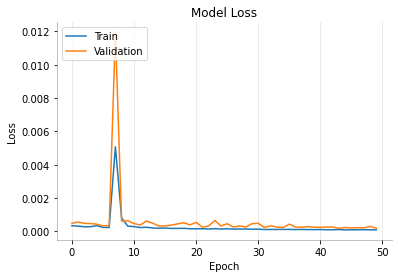

time: 585 ms (started: 2022-05-07 12:16:39 +00:00)


In [33]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

#plt.legend(loc='upper left')
plt.grid(axis='x', alpha=.3)

#plt.savefig('precipitation(1).eps', format='eps')
plt.savefig("Clear_Skyii(1).png", format="png", dpi=300)

In [22]:
from math import sqrt
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_validate)


#inverse
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = t_transformer.inverse_transform(y_test.reshape((len(y_test), 1)))
y_pred_inv = t_transformer.inverse_transform(y_pred)

y_validate_inv = t_transformer.inverse_transform(y_validate.reshape(-1, 1))

y_pred_train_inv = t_transformer.inverse_transform(y_pred_train)
y_pred_val_inv = t_transformer.inverse_transform(y_pred_val)

time: 3min 13s (started: 2022-05-07 12:11:45 +00:00)


In [23]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.5f' % rmse)


Test RMSE: 30.88570
time: 2.02 ms (started: 2022-05-07 12:15:06 +00:00)


In [24]:
actual_test=y_test_inv
Nrmse_test=rmse /(actual_test.max() - actual_test.min())

print(Nrmse_test)

0.012334544930695095
time: 1.91 ms (started: 2022-05-07 12:15:10 +00:00)


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test_inv, y_pred_inv)

0.010754312032936142

time: 3.46 ms (started: 2022-05-07 12:15:14 +00:00)


In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_inv, y_pred_inv)

22.614197547932427

time: 4.07 ms (started: 2022-05-07 12:15:19 +00:00)


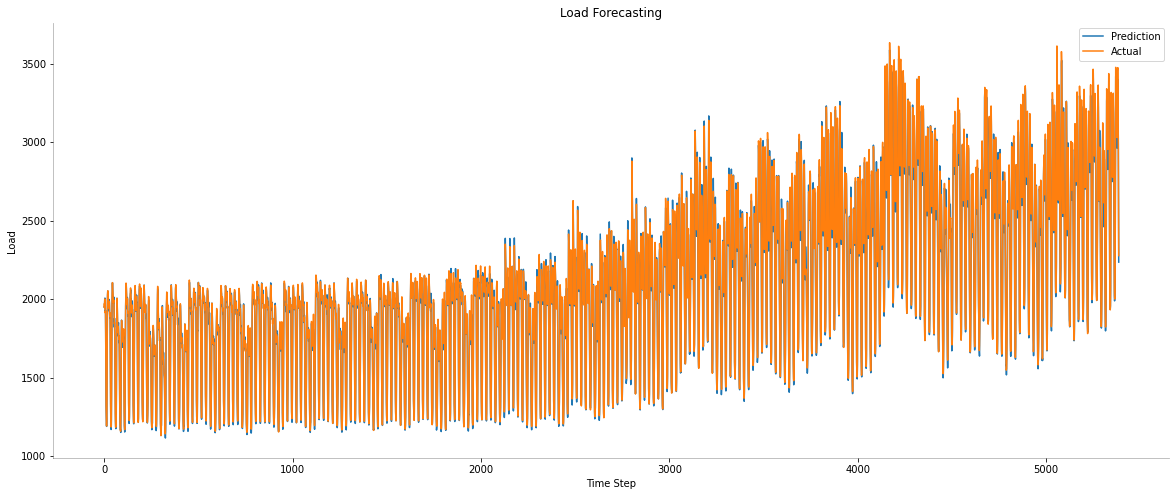

time: 2.66 s (started: 2022-05-07 12:15:28 +00:00)


In [27]:
plt.figure(figsize=(20,8))
plt.plot(y_pred_inv, label="Prediction" )
plt.plot(y_test_inv, label="Actual")
plt.legend()
plt.ylabel('Load')
plt.xlabel('Time Step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load Forecasting')

#plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

#plt.legend(loc='upper left')
#plt.grid(axis='x', alpha=.3)
#plt.savefig('precipitation(2).eps', format='eps')
plt.savefig("Clear_Skyii(2).png", format="png", dpi=300)

No handles with labels found to put in legend.


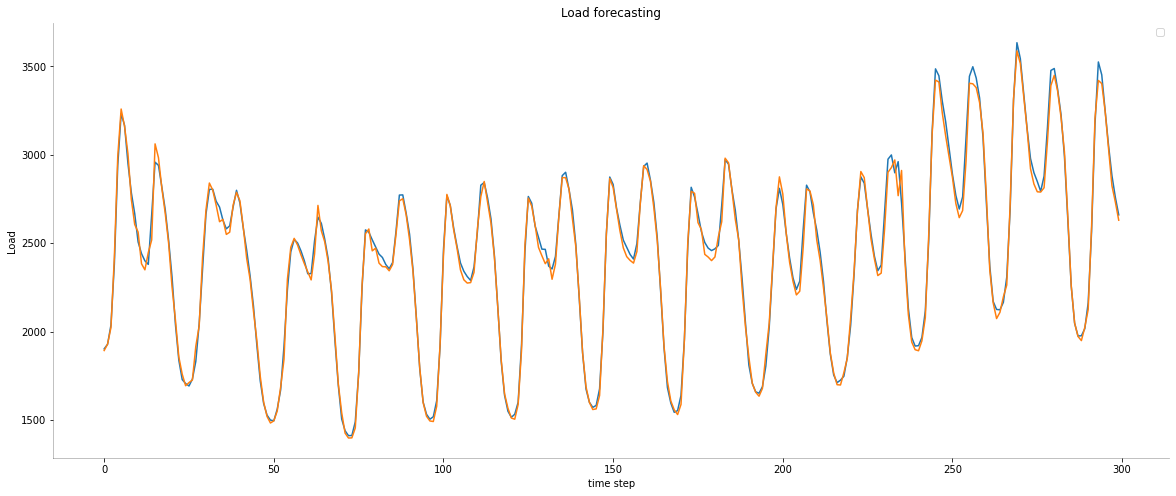

time: 2 s (started: 2022-05-07 12:15:40 +00:00)


In [28]:
#zoom in spikes


plt.figure(figsize=(20,8))

plt.plot(y_test_inv[3900:4200])
plt.plot(y_pred_inv[3900:4200])
plt.legend()
plt.ylabel('Load')
plt.xlabel('time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load forecasting')

#plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

#plt.legend(loc='upper left')
#plt.grid(axis='x', alpha=.3)

#plt.savefig('precipitation(3).eps', format='eps')
plt.savefig("Clear_Skyii(3).png", format="png", dpi=300)

No handles with labels found to put in legend.


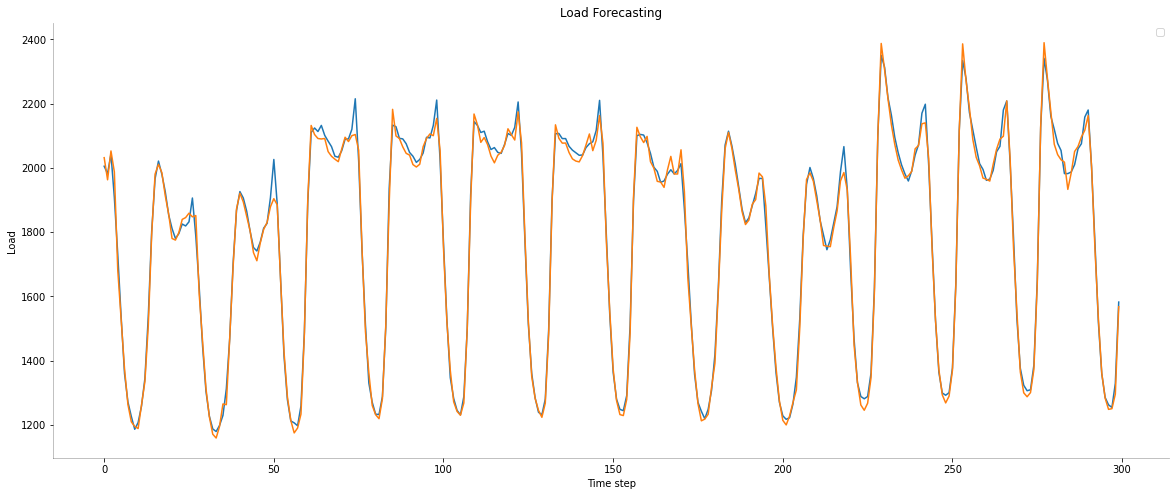

time: 1.75 s (started: 2022-05-07 12:15:55 +00:00)


In [29]:
#zoom in spikes


plt.figure(figsize=(20,8))

plt.plot(y_test_inv[1900:2200])
plt.plot(y_pred_inv[1900:2200])
plt.legend()
plt.ylabel('Load')
plt.xlabel('Time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load Forecasting')

#plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

#plt.legend(loc='upper left')
#plt.grid(axis='x', alpha=.3)

#plt.savefig('Relative Humidity(3).eps', format='eps')
plt.savefig("Clear_Skyii(7).png", format="png", dpi=300)

In [30]:
test_2=test.reset_index()
new_test = test_2.filter(['DateTime'])
#new_test.loc[24:, :]

train_2=train.reset_index()
new_train = train_2.filter(['DateTime'])
#new_train.loc[24:, :]

val_2=val.reset_index()
new_val = val_2.filter(['DateTime'])
#new_val.loc[24:, :]


time: 8.3 ms (started: 2022-05-07 12:16:03 +00:00)


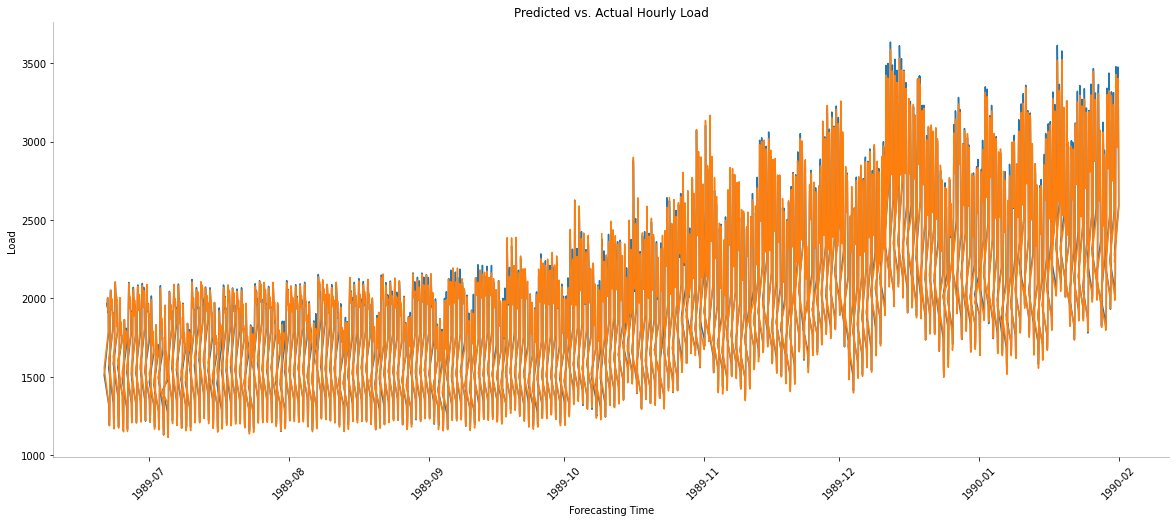

time: 2.23 s (started: 2022-05-07 12:16:10 +00:00)


In [31]:
#plot with dates

import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

# Plot all predictions
#inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(new_test.loc[24:, :],y_test_inv)
valpred, =plt.plot(new_test.loc[24:, :],y_pred_inv)
plt.xlabel('Forecasting Time')
plt.ylabel('Load')
plt.title("Predicted vs. Actual Hourly Load")

plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

#plt.legend(loc='upper left')
#plt.grid(axis='x', alpha=.3)

#plt.savefig('precipitation(4).eps', format='eps')
plt.savefig("Clear_Skyii(4).png", format="png", dpi=300)

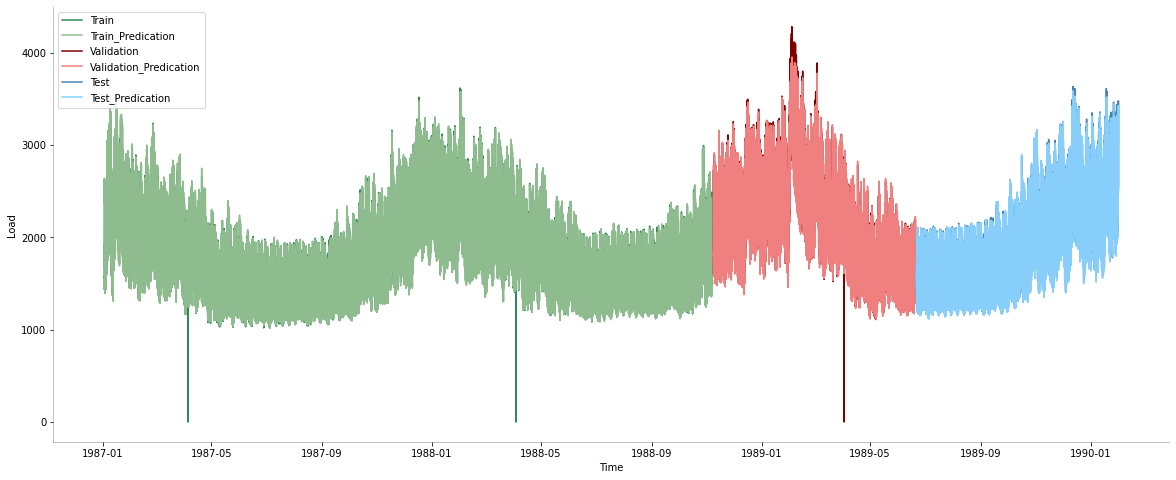

time: 2.49 s (started: 2022-05-07 12:16:24 +00:00)


In [32]:
#whole data plot wiyh pred


plt.figure(figsize=(20,8))

plt.plot(new_train.loc[24:, :], y_train_inv.flatten(), 'seagreen', label="Train")
plt.plot(new_train.loc[24:, :], y_pred_train_inv.flatten(), 'darkseagreen', label="Train_Predication")

plt.plot(new_val.loc[24:, :], y_validate_inv.flatten(), 'maroon', label="Validation")
plt.plot(new_val.loc[24:, :], y_pred_val_inv.flatten(), 'lightcoral', label="Validation_Predication")

plt.plot(new_test.loc[24:, :], y_test_inv.flatten(),'steelblue',  label="Test")
plt.plot(new_test.loc[24:, :], y_pred_inv.flatten(), 'lightskyblue', label="Test_Predication")

plt.ylabel('Load')
plt.xlabel('Time')
plt.legend()

#plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
#plt.grid(axis='x', alpha=.3)

#plt.savefig('precipitation(6).eps', format='eps')
plt.savefig("Clear_Skyii(6).png", format="png", dpi=300)

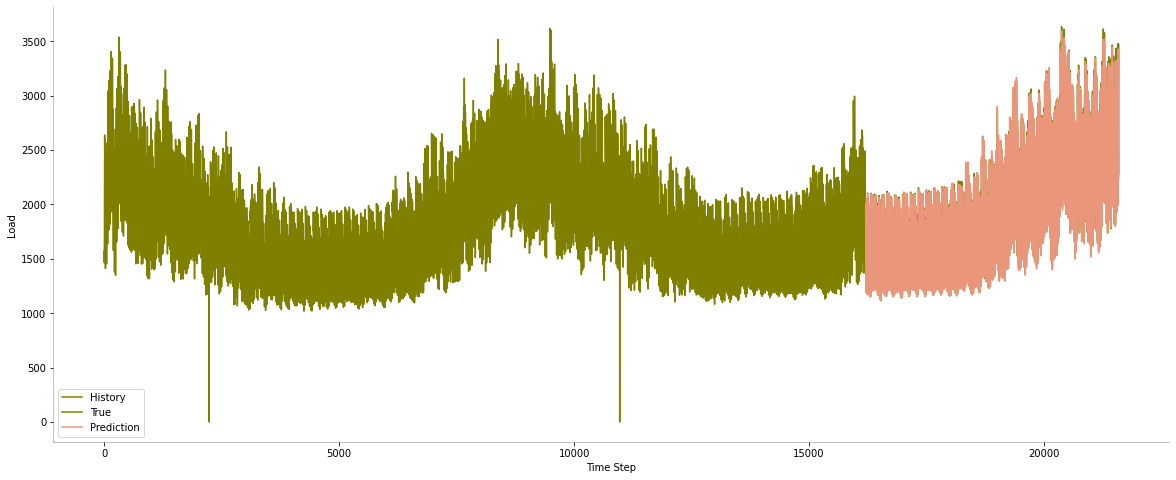

time: 3.73 s (started: 2022-05-07 12:23:38 +00:00)


In [36]:
#whole data plot

plt.figure(figsize=(20,8))

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'olive', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(),'olive', label="True")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'darksalmon', label="Prediction")

plt.ylabel('Load')
plt.xlabel('Time Step')
plt.legend()

#plt.xticks(rotation = 45)
#/* Lighten borders */
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

#plt.legend(loc='upper left')
#plt.grid(axis='x', alpha=.3)

#plt.savefig('precipitation(5).eps', format='eps')
plt.savefig("Clear_Skyii(5).png", format="png", dpi=300)